# **Backpack Price Prediction Using Deep Learning**
### Playground Series Season 5 Episode 2 ([Kaggle Competition](https://www.kaggle.com/competitions/playground-series-s5e2/overview))

  
- Backpacks are an essential component of daily life, reflecting both utility and style. Predicting the price of a backpack involves understanding a multitude of factors, including brand, material, size, features like laptop compartments and waterproofing, as well as aesthetic choices like style and color.

- This project is dedicated to building a sophisticated **deep learning regression model** to estimate backpack prices based on their attributes. Our work leverages the extensive dataset provided by the Kaggle competition, *Playground Series Season 5 Episode 2*, to develop a data-driven approach that captures nuanced relationships between features.

- The core goal of this project is to **minimize prediction errors** while maximizing the accuracy of the model. To achieve this, the **Root Mean Square Error (RMSE)** serves as our principal evaluation metric, reflecting the precision of our predictions.




# Importing the necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

# Importing the data

In [ ]:
df=pd.read_csv(r'train.csv')

In [3]:
df.shape

(300000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [ ]:
df2=pd.read_csv(r'training_extra.csv')

In [6]:
df2.shape

(3694318, 11)

In [7]:
df2.isnull().sum()

id                           0
Brand                   117053
Material                102615
Size                     81190
Compartments                 0
Laptop Compartment       91089
Waterproof               87274
Style                    96210
Color                   123667
Weight Capacity (kg)      1670
Price                        0
dtype: int64

In [8]:
#combining the train and training extra dataset
df=pd.concat([df,df2])

# EDA - Exploratory Data Analysis 

In [9]:
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3994318 entries, 0 to 3694317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 365.7+ MB


In [11]:
df.shape

(3994318, 11)

In [12]:
df.isnull().sum()

id                           0
Brand                   126758
Material                110962
Size                     87785
Compartments                 0
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)      1808
Price                        0
dtype: int64

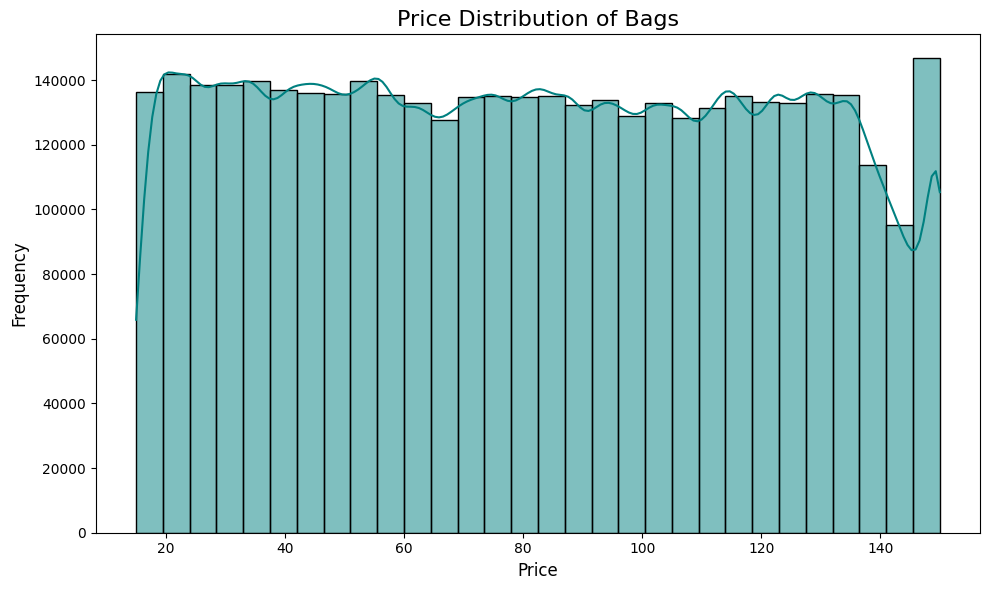

In [13]:
#price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Price"], kde=True, color="teal", bins=30)
plt.title("Price Distribution of Bags", fontsize=16)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

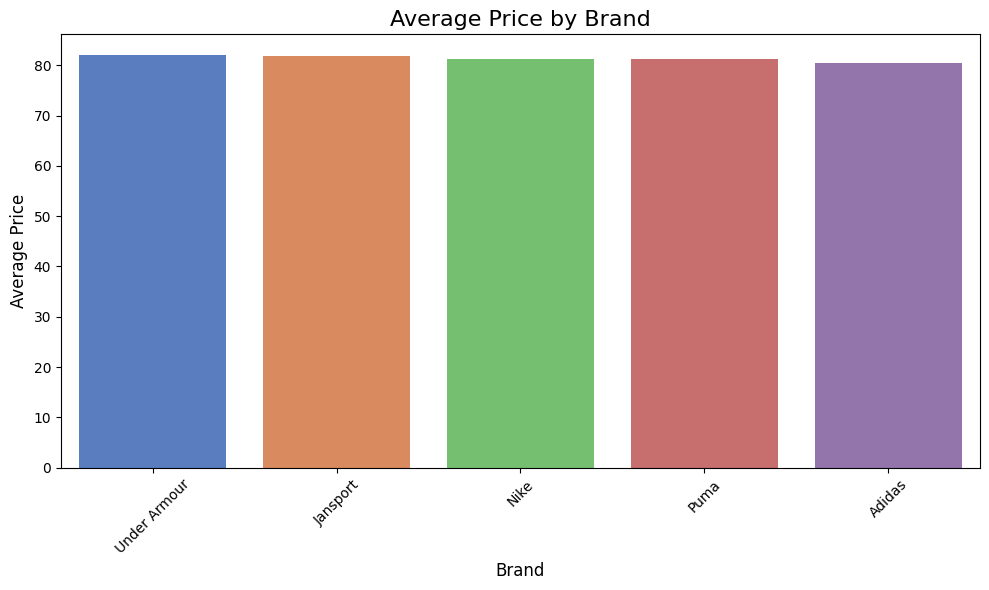

In [14]:
#price vs brand
plt.figure(figsize=(10, 6))
brand_price = df.groupby("Brand")["Price"].mean().sort_values(ascending=False)
sns.barplot(x=brand_price.index, y=brand_price.values, palette="muted")
plt.title("Average Price by Brand", fontsize=16)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


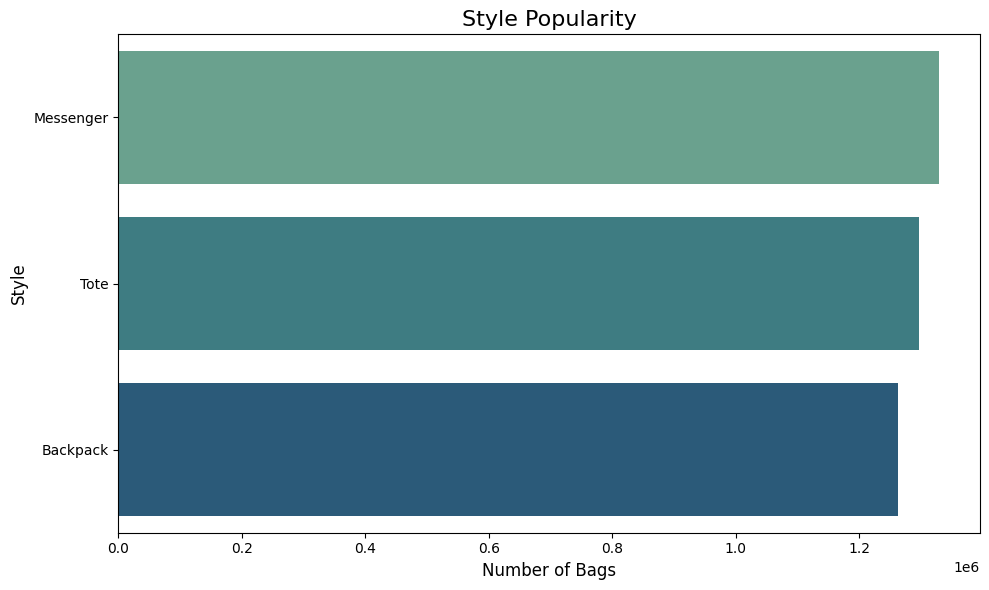

In [16]:
#style popularity
plt.figure(figsize=(10, 6))
style_counts = df["Style"].value_counts()
sns.barplot(y=style_counts.index, x=style_counts.values, palette="crest")
plt.title("Style Popularity", fontsize=16)
plt.xlabel("Number of Bags", fontsize=12)
plt.ylabel("Style", fontsize=12)
plt.tight_layout()
plt.show()

# Feature Engineering

In [17]:
#dropping the 'id' column
df = df.drop(columns=["id"])

In [18]:
#filling the empty numeric columns with mean
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [19]:
#filling the empty categorical columns with mode
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Deep Learning Modelling

In [20]:
#one-hot encoding categorical features
df = pd.get_dummies(df, drop_first=True)

x = df.drop(columns=["Price"])
y = df["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
#building the model
model = Sequential([
    Dense(512, activation="relu", input_shape=(x_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(256, activation="relu"),
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(1)
])

#compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="mse", metrics=["mae"])

In [22]:
#early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

#training the model
history = model.fit(x_train_scaled, y_train, validation_data=(x_test_scaled, y_test), 
                    epochs=30, batch_size=1024, callbacks=[early_stop], verbose=1)

Epoch 1/30
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 65s 20ms/step - loss: 1794.4976 - mae: 35.7161 - val_loss: 1945.3613 - val_mae: 36.7455
Epoch 2/30
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 62s 20ms/step - loss: 1557.1375 - mae: 33.9926 - val_loss: 1869.0138 - val_mae: 36.1920
Epoch 3/30
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 63s 20ms/step - loss: 1545.8540 - mae: 33.9018 - val_loss: 2041.1115 - val_mae: 37.4430
Epoch 4/30
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 61s 19ms/step - loss: 1538.2156 - mae: 33.8499 - val_loss: 1887.5815 - val_mae: 36.3319
Epoch 5/30
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 60s 19ms/step - loss: 1532.8170 - mae: 33.8161 - val_loss: 1873.8413 - val_mae: 36.2357
Epoch 6/30
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 58s 19ms/step - loss: 1525.9207 - mae: 33.7580 - val_loss: 1983.6545 - val_mae: 37.0303
Epoch 7/30
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 59s 19ms/step - loss: 1523.7681 - mae: 33.7418 - val_loss: 1755.9132 - val_mae: 35.3816
Epoch 8/30
3121/3121 ━━━━━━━━━━━━━━━━━━━━ 58s 19ms/step - loss: 1520.7473 - mae: 33.7078 -

In [23]:
#evaluate the model
predictions = model.predict(x_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"RMSE: {rmse}")

24965/24965 ━━━━━━━━━━━━━━━━━━━━ 110s 4ms/step
RMSE: 38.89751903775029


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 556,037 (2.12 MB)

 Trainable params: 185,345 (724.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 370,692 (1.41 MB)

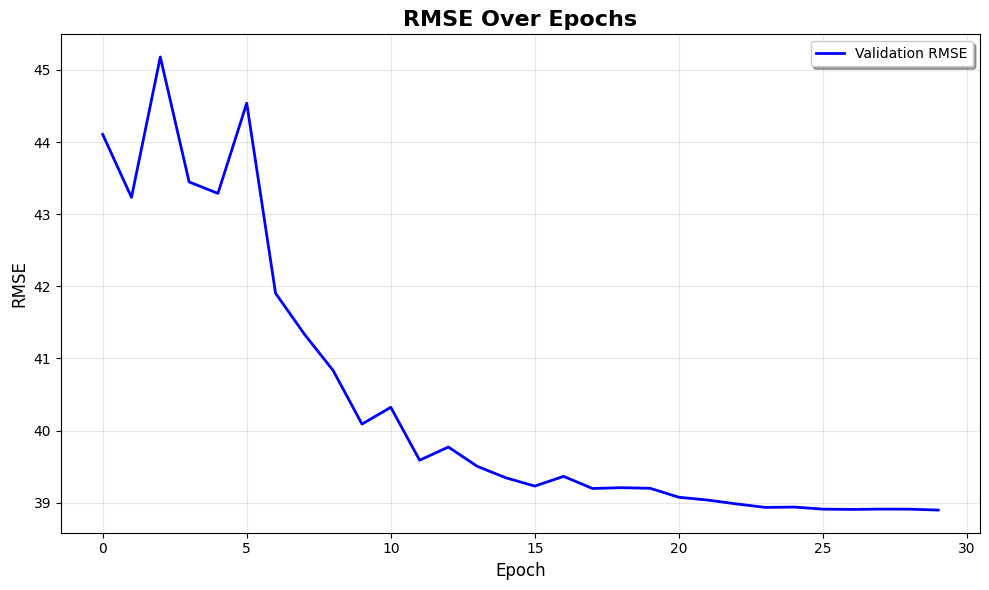

In [25]:
#RMSE over epochs
rmse_per_epoch = [val_loss ** 0.5 for val_loss in history.history['val_loss']]
plt.figure(figsize=(10, 6))
plt.plot(rmse_per_epoch, label='Validation RMSE', color='blue', lw=2)
plt.title("RMSE Over Epochs", fontsize=16, fontweight='bold')
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=10, shadow=True)
plt.tight_layout()
plt.show()

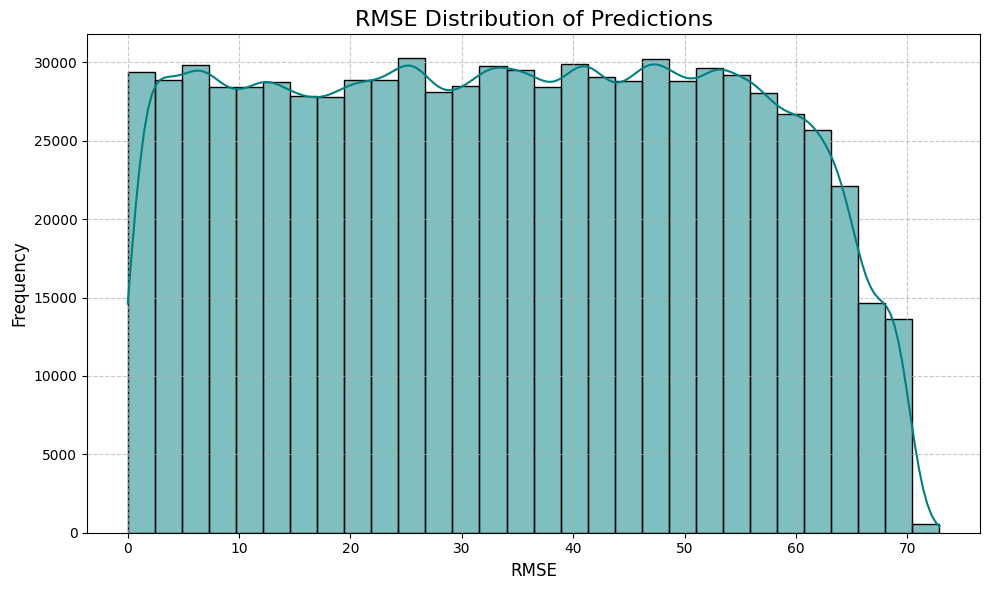

In [26]:
#RMSE distribution of predictions
plt.figure(figsize=(10, 6))
errors = np.sqrt((y_test - predictions.flatten())**2)
sns.histplot(errors, kde=True, color="teal", bins=30)
plt.title("RMSE Distribution of Predictions", fontsize=16)
plt.xlabel("RMSE", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Testing and preparing submission file

In [ ]:
test=pd.read_csv(r'test.csv')

#preprocessing test data
submission = pd.DataFrame({'id': test['id']})
test = test.drop(columns=['id'])

#one-hot encoding the test data and align columns
test = pd.get_dummies(test, drop_first=True)
test = test.reindex(columns=x.columns, fill_value=0)

#scaling
test_scaled = scaler.transform(test)

In [29]:
#making predictions on test data
predictions = model.predict(test_scaled)

#adding predicted values to df and create submission file
submission['Price'] = predictions.flatten()
#submission.to_csv('submission.csv', index=False)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step


# **Conclusion**

- In this project, we developed a deep learning regression model for predicting backpack prices, achieving an RMSE of 38. While this indicates a reasonable performance, the dataset presented unique challenges.

- As observed from the analysis and visualizations, the features lacked significant variability to distinguish price patterns effectively. Attributes like size, material, and brand showed minimal influence on price, making it difficult to capture meaningful relationships in the data.

- Despite these limitations, the model's performance highlights its ability to generalize under constrained conditions. Future improvements could involve enriching the dataset with additional, more distinct features or integrating external data sources for better feature engineering.